# Selecting the proper statistical test

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
sns.set_style('darkgrid')
%matplotlib inline

In [222]:
df = pd.read_csv('../../_Datasets/EurSocSur.csv')

In [169]:
def verify_test(country, interest):
    newdf = df[df['cntry'] == country][[interest, 'idno', 'year']]
    yr12 = newdf[(newdf.year == 6) & (newdf[interest].isna() == True)].idno
    yr14 = newdf[(newdf.year == 7) & (newdf[interest].isna() == True)].idno
    print(country, '\n', '2012 idnos from {}: {}' .format(str(interest), yr12.to_list()),'\n', '2014 idnos from {}: {}' .format(str(interest), yr14.to_list()))
    return yr12, yr14

def val_diff(interest):
    for country in df.cntry.unique():
        verify_test(country, interest)
        
def extract_val(interest):
    mydict = {}
    for country in df.cntry.unique():
        yr12 = df[(df.cntry == country) & (df.year == 6)][interest].dropna().to_numpy()
        yr14 = df[(df.cntry == country) & (df.year == 7)][interest].dropna().to_numpy()
        yr12 = yr12[~np.isnan(yr12)]
        yr14 = yr14[~np.isnan(yr14)]
        mydict[str(country) + '12'] = yr12
        mydict[str(country) + '14'] = yr14
    return mydict        

C:\Users\seapea\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\seapea\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


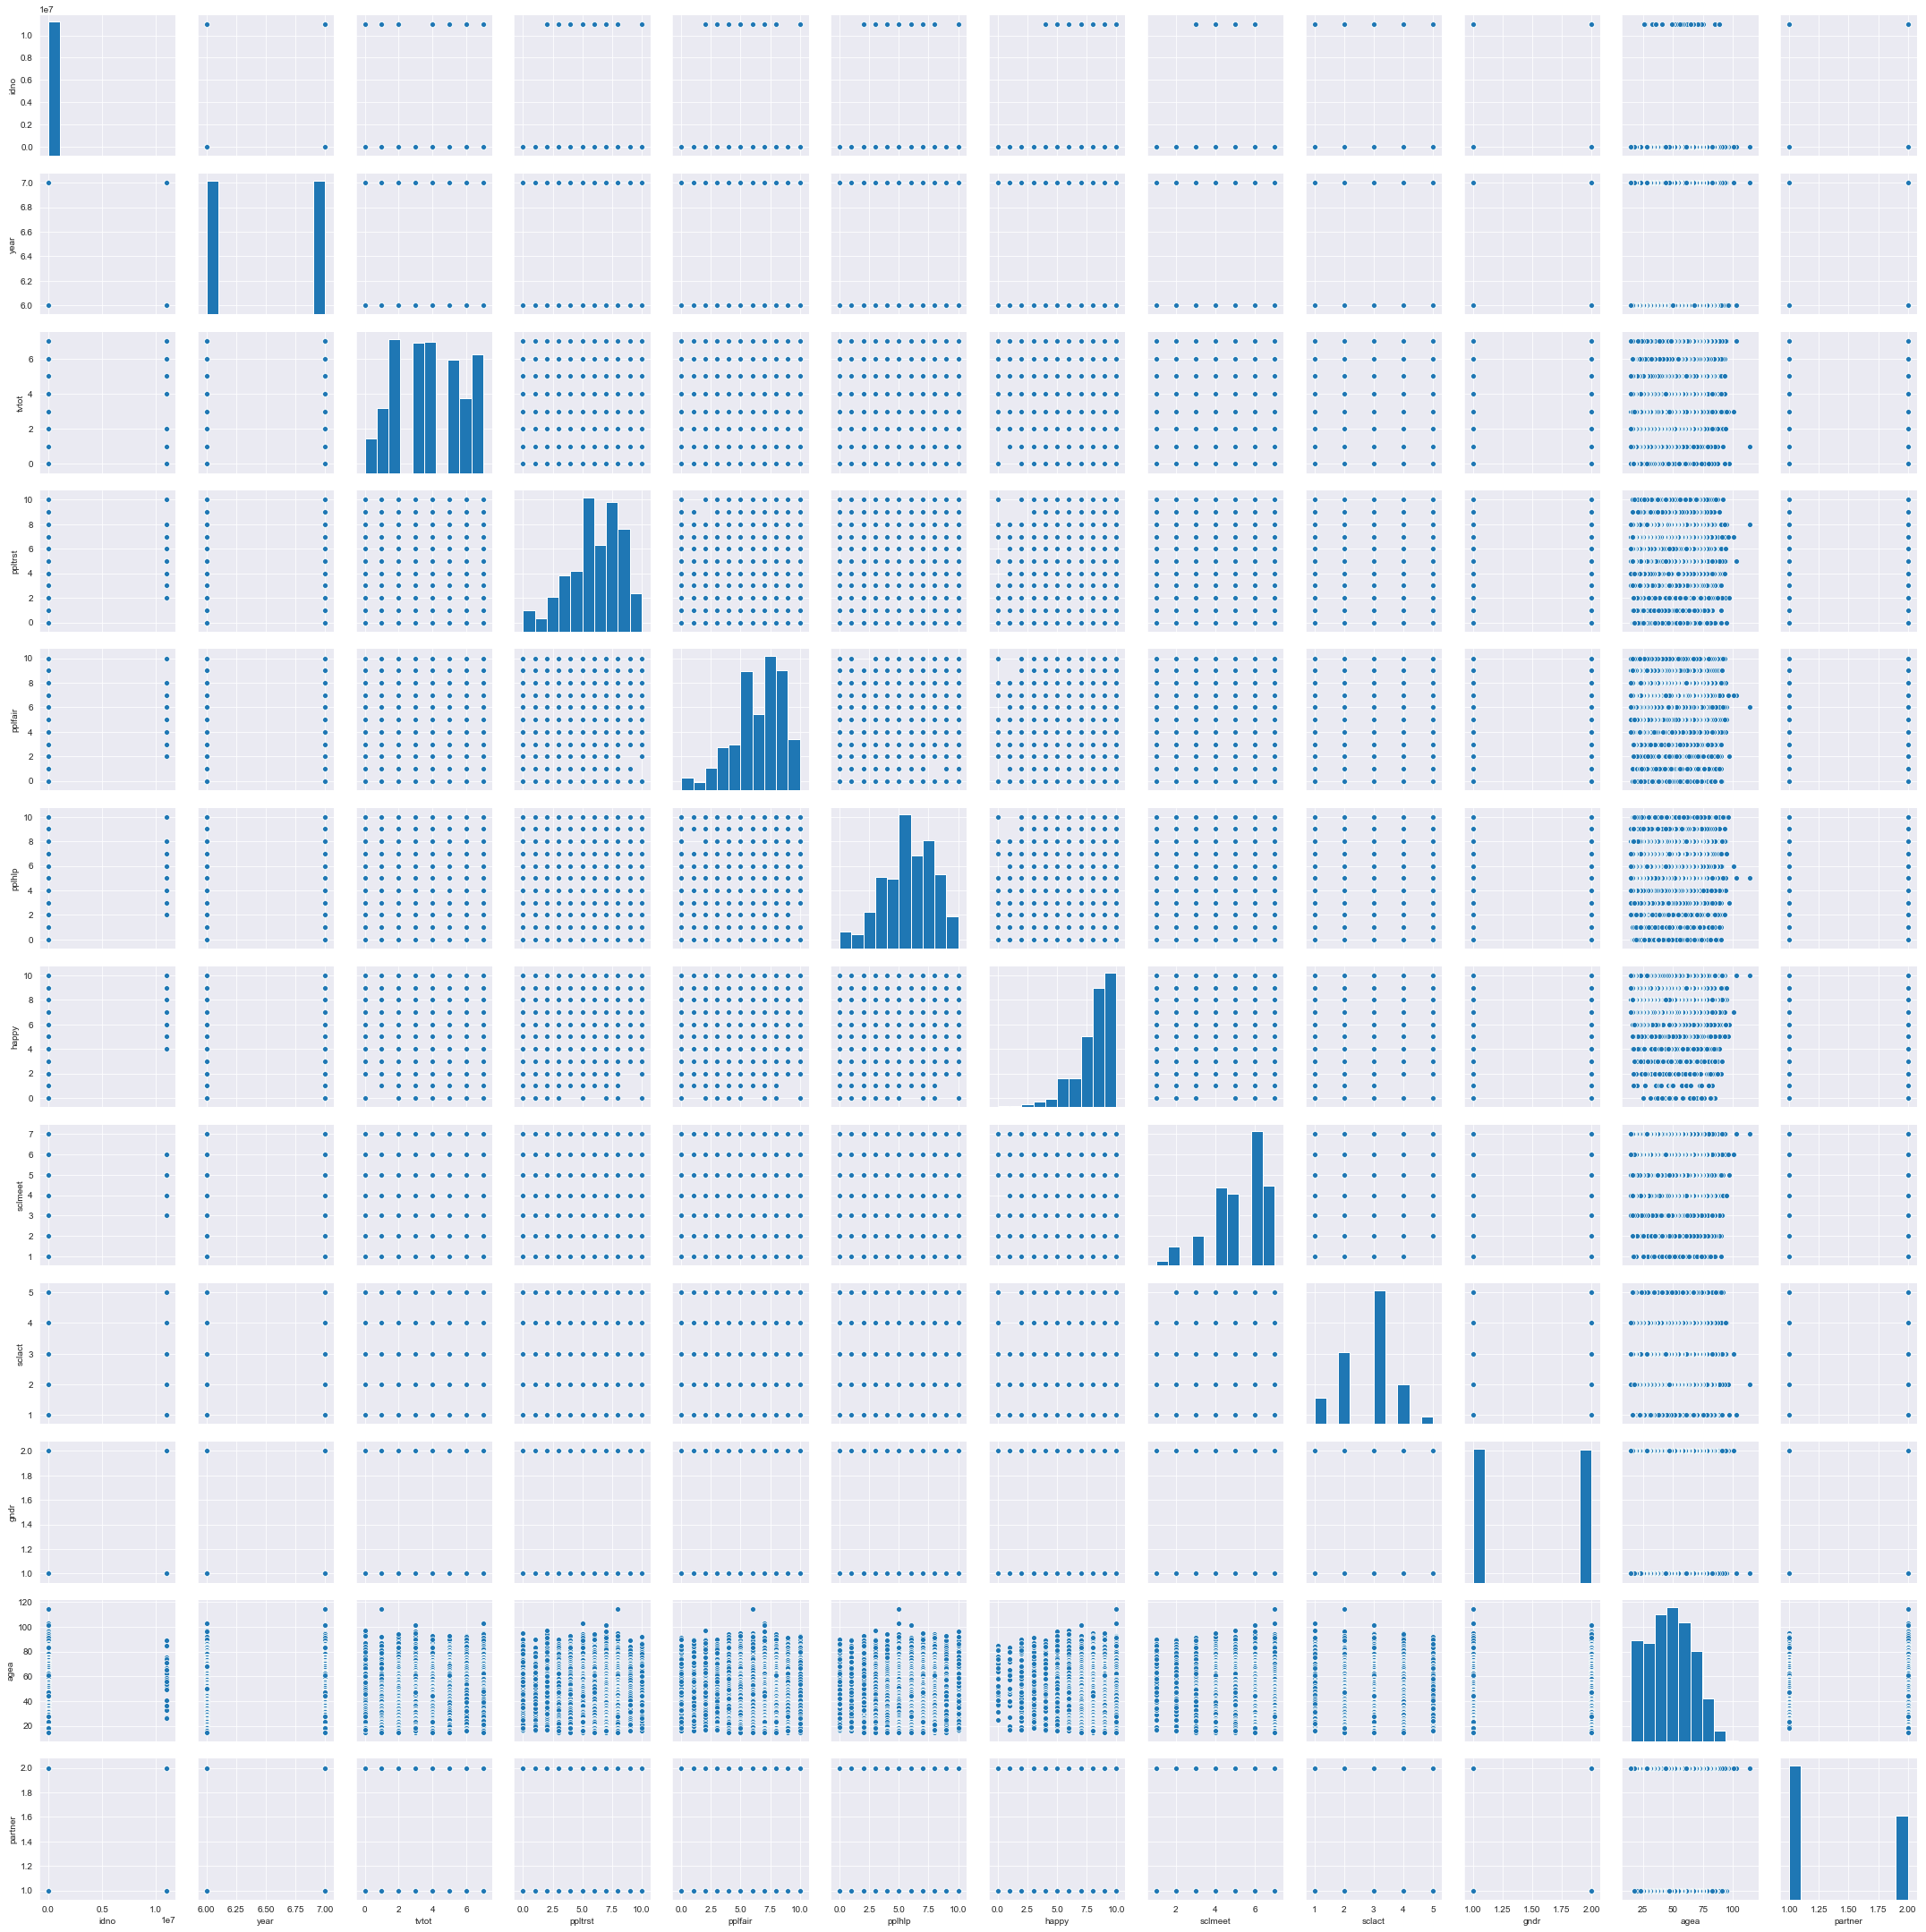

In [230]:
sns.pairplot(df)

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

We can actually run a paired ttest on Switzerland and Germany, as the samples match perfectly. The other samples do not match, so we should run a ttest_ind.

In [181]:
val_diff('ppltrst')

CH 
 2012 idnos from ppltrst: [] 
 2014 idnos from ppltrst: []
CZ 
 2012 idnos from ppltrst: [1101.0, 1268.0, 1308.0, 1316.0, 1331.0, 2097.0, 2118.0] 
 2014 idnos from ppltrst: [1314.0]
DE 
 2012 idnos from ppltrst: [] 
 2014 idnos from ppltrst: []
ES 
 2012 idnos from ppltrst: [] 
 2014 idnos from ppltrst: [814.0, 1921.0]
NO 
 2012 idnos from ppltrst: [10836.0] 
 2014 idnos from ppltrst: [18678.0]
SE 
 2012 idnos from ppltrst: [499.0, 3561.0] 
 2014 idnos from ppltrst: []


In [170]:
trust = extract_val('ppltrst')

In [174]:
scipy.stats.ttest_rel(trust['CH12'], trust['CH14'])

Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

In [175]:
scipy.stats.ttest_rel(trust['DE12'], trust['DE14'])

Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

In [176]:
scipy.stats.ttest_ind(trust['CZ12'], trust['CZ14'])

Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626856563)

In [177]:
scipy.stats.ttest_ind(trust['ES12'], trust['ES14'])

Ttest_indResult(statistic=2.494276516716002, pvalue=0.012687599930326627)

In [179]:
scipy.stats.ttest_ind(trust['NO12'], trust['NO14'])

Ttest_indResult(statistic=0.5437669865283744, pvalue=0.5866849635988214)

In [178]:
scipy.stats.ttest_ind(trust['SE12'], trust['SE14'])

Ttest_indResult(statistic=-2.089164843127998, pvalue=0.03683208699520371)

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.

At first I thought this would use a ttest_rel, but it actually looks like the samples don't match up, one-for-one. This is verified in our verify_test function. Since it is very close, it would probably acceptable to do a related ttest.

In [185]:
val_diff('happy')

CH 
 2012 idnos from happy: [715.0, 789.0, 2397.0] 
 2014 idnos from happy: []
CZ 
 2012 idnos from happy: [1039.0, 1058.0, 1066.0, 1149.0, 1177.0, 1243.0, 1246.0, 1289.0, 1386.0, 1388.0, 1472.0, 2119.0] 
 2014 idnos from happy: [1036.0, 1040.0, 1109.0, 1164.0, 1266.0, 1387.0]
DE 
 2012 idnos from happy: [] 
 2014 idnos from happy: []
ES 
 2012 idnos from happy: [1210.0] 
 2014 idnos from happy: [885.0]
NO 
 2012 idnos from happy: [9846.0, 10836.0, 14862.0, 20076.0] 
 2014 idnos from happy: []
SE 
 2012 idnos from happy: [1494.0] 
 2014 idnos from happy: [165.0, 252.0, 787.0]


In [186]:
for country in df.cntry.unique():
    yr12 = df[(df.cntry == country) & (df.year == 6)].happy.dropna().to_list()
    yr14 = df[(df.cntry == country) & (df.year == 7)].happy.dropna().to_list()
    yr12 = np.array(yr12)
    yr14 = np.array(yr14)
    print(scipy.stats.ttest_ind(yr12, yr14))

Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552554684)
Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243592707)
Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838)
Ttest_indResult(statistic=1.673984509948487, pvalue=0.09426276206929331)
Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786815807e-05)
Ttest_indResult(statistic=-0.5748685401292095, pvalue=0.5654516534862527)


### Who reported watching more TV in 2012? Men or women?
This looks to be based on just two different samples and two populations - men and women in 2012. For that we just use a ttest_ind.

In [195]:
# male is 1, female 2
male = df[(df['gndr'] == 1.0) & (df['year'] == 6)]['tvtot'].to_numpy()
female = df[(df['gndr'] == 2.0) & (df['year'] == 6)]['tvtot'].to_numpy()

In [210]:
scipy.stats.ttest_ind(male[~np.isnan(male)], female[~np.isnan(female)])

Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.4902360402696986)

### Who was more likely to believe people were fair in 2012, people living with a partner or living alone?
This is similar to the question above in that one population cannot at all inclusive of the other - the conditions are mutually exclusive. We will use a ttest_ind.

In [226]:
single = df[(df['year'] == 6) & (df['partner'] == 2)]['pplfair'].to_numpy()
couple = df[(df['year'] == 6) & (df['partner'] == 1)]['pplfair'].to_numpy()

In [229]:
scipy.stats.ttest_ind(single[~np.isnan(single)], couple[~np.isnan(couple)])

Ttest_indResult(statistic=-3.3201033970362084, pvalue=0.0009073952609883756)

### Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
These are certainly unrelated samples - we are looking at residents of different countries. Furthermore, it is more than two different samples we are considering; we have three and will use one-way ANOVA. With the functions we have created to select and preprocess the data, this is quick.

In [216]:
social = extract_val('sclmeet')
social.keys()

dict_keys(['CH12', 'CH14', 'CZ12', 'CZ14', 'DE12', 'DE14', 'ES12', 'ES14', 'NO12', 'NO14', 'SE12', 'SE14'])

In [219]:
scipy.stats.f_oneway(social['SE14'], social['NO14'], social['CH14'])

F_onewayResult(statistic=8.134820549190636, pvalue=0.0003012824769500138)

### Pick three or four of the countries in the sample and compare how often people took part in social activites, relative to otherse their age, in 2014. Are there differences, and if so, which countries stand out?
Similar to above - consider this: These are certainly unrelated samples - we are looking at residents of different countries. Furthermore, it is more than two different samples we are considering; we have three and will use one-way ANOVA.

In [221]:
act = extract_val('sclact')
scipy.stats.f_oneway(act['SE14'], act['NO14'], act['CH14'])

F_onewayResult(statistic=2.8234984652683965, pvalue=0.05959534596748375)